## Training FCN8_ResNet50 With CelebA Dataset
### By 10 epochs, 3200steps.

In [14]:
import os
import sys
import datetime

import PIL.Image as Image
import matplotlib.pyplot as plt
%matplotlib inline

ROOT_DIR = os.path.join(os.getcwd(), '../..')
sys.path.append(ROOT_DIR)

In [15]:
from keras_segmentation.models.fcn import fcn_8_resnet50 as M

In [16]:
now = datetime.datetime.now()
NOW = "{:%Y%m%dT%H%M}".format(now)

OUT_DIR = os.path.join(ROOT_DIR, 'out')
CHECKPOINTS_DIR = os.path.join(OUT_DIR, 'checkpoints')
PREDICTIONS_DIR = os.path.join(OUT_DIR, 'predictions')
LOGS_DIR = os.path.join(OUT_DIR, 'logs')

DATASET_DIR = os.path.join(ROOT_DIR, 'dataset/celeba')

TRAIN_IMAGES = os.path.join(DATASET_DIR, 'train/original')
TRAIN_ANNOTATIONS = os.path.join(DATASET_DIR, 'train/mask_')
VAL_IMAGES = os.path.join(DATASET_DIR, 'val/original')
VAL_ANNOTATIONS = os.path.join(DATASET_DIR, 'val/mask_')

In [17]:
## Configurations

MODEL_NAME = "fcn_8_resnet50"
N_CLASSES = 3
#I_HEIGHT = 416
I_HEIGHT = 218
#I_WIDTH = 608
I_WIDTH = 178

STEPS_PER_EPOCH = 3200

EPOCHS = 10

In [18]:
tag = 'celeba/{name}/ep{epochs}/st{steps}'.format(
    name=MODEL_NAME,
    epochs=EPOCHS,
    steps=STEPS_PER_EPOCH
)

CHECKPOINTS_DIR = os.path.join(CHECKPOINTS_DIR, tag)
PREDICTIONS_DIR = os.path.join(PREDICTIONS_DIR, tag)
LOGS_DIR = os.path.join(LOGS_DIR, tag)
if not os.path.exists(CHECKPOINTS_DIR):
    os.makedirs(CHECKPOINTS_DIR)
if not os.path.exists(PREDICTIONS_DIR):
    os.makedirs(PREDICTIONS_DIR)
if not os.path.exists(LOGS_DIR):
    os.makedirs(LOGS_DIR)
    
dir_configuration = """
NOW = {now}
tag = {tag}
out_dir : {out_dir}
checkpoints_dir : {checkpoints_dir}
logs_dir : {logs_dir}
predictions_dir : {predictions_dir}

dataset_dir : {dataset_dir}
train_images : {train_images}
train_annotations : {train_annotations}
val_images : {val_images}
val_annotations : {val_annotations}
""".format(
    now=NOW,
    tag=tag,
    out_dir=OUT_DIR,
    checkpoints_dir=CHECKPOINTS_DIR,
    logs_dir=LOGS_DIR,
    predictions_dir=PREDICTIONS_DIR,

    dataset_dir=DATASET_DIR,
    train_images=TRAIN_IMAGES,
    train_annotations=TRAIN_ANNOTATIONS,
    val_images=VAL_IMAGES,
    val_annotations=VAL_ANNOTATIONS,
)
print(dir_configuration)


NOW = 20200419T1445
tag = celeba/fcn_8_resnet50/ep10/st3200
out_dir : /home/jho/projects/image-segmentation-keras/train_faces/fcn8/../../out
checkpoints_dir : /home/jho/projects/image-segmentation-keras/train_faces/fcn8/../../out/checkpoints/celeba/fcn_8_resnet50/ep10/st3200
logs_dir : /home/jho/projects/image-segmentation-keras/train_faces/fcn8/../../out/logs/celeba/fcn_8_resnet50/ep10/st3200
predictions_dir : /home/jho/projects/image-segmentation-keras/train_faces/fcn8/../../out/predictions/celeba/fcn_8_resnet50/ep10/st3200

dataset_dir : /home/jho/projects/image-segmentation-keras/train_faces/fcn8/../../dataset/celeba
train_images : /home/jho/projects/image-segmentation-keras/train_faces/fcn8/../../dataset/celeba/train/original
train_annotations : /home/jho/projects/image-segmentation-keras/train_faces/fcn8/../../dataset/celeba/train/mask_
val_images : /home/jho/projects/image-segmentation-keras/train_faces/fcn8/../../dataset/celeba/val/original
val_annotations : /home/jho/projects

In [19]:
# Define model
model = M(n_classes=N_CLASSES, input_height=I_HEIGHT, input_width=I_WIDTH)

AssertionError: 

In [12]:
# Train
checkpoints_path = os.path.join(CHECKPOINTS_DIR, NOW)
logs_path = os.path.join(LOGS_DIR, NOW)

model.train(
    train_images = TRAIN_IMAGES,
    train_annotations = TRAIN_ANNOTATIONS,
    checkpoints_path=checkpoints_path,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    log_dir=logs_path,
    validate=True,
    val_images=VAL_IMAGES,
    val_annotations = VAL_ANNOTATIONS,
    save_best_only=True # Save model if 'val_loss' had been improved.
)

NameError: name 'model' is not defined

In [34]:
import random
val_list = os.listdir(VAL_IMAGES)
rand_val = random.choice(val_list)[:-4]
print(rand_val)

sample_test_image = os.path.join(VAL_IMAGES, rand_val + '.jpg')
sample_test_annotaion = os.path.join(VAL_ANNOTATIONS, rand_val + '.bmp')
out_fname = os.path.join(PREDICTIONS_DIR, 'out_{}_{}.png'.format(rand_val, NOW))

192753


In [35]:
# Out
out = model.predict_segmentation(
    inp=sample_test_image,
    out_fname=out_fname
)

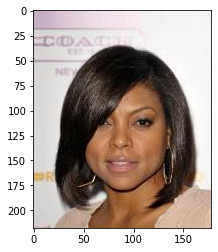

In [36]:
plt.imshow(Image.open(sample_test_image))

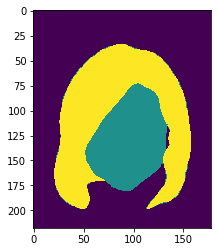

In [37]:
plt.imshow(Image.open(sample_test_annotaion))

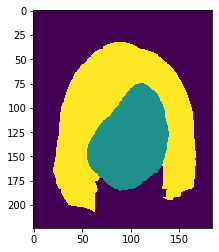

In [38]:
plt.imshow(out)

In [13]:
# evaluating the model
evaluation = model.evaluate_segmentation(inp_images_dir=VAL_IMAGES, annotations_dir=VAL_ANNOTATIONS)
print(evaluation)


355it [00:08, 43.54it/s]

{'frequency_weighted_IU': 0.89701076174451, 'mean_IU': 0.8634796629707443, 'class_wise_IU': array([0.93265558, 0.89763084, 0.76015257])}
